Implementation of Gender classification using Iris super resolution dataset

Visualizing the iris super resolution images

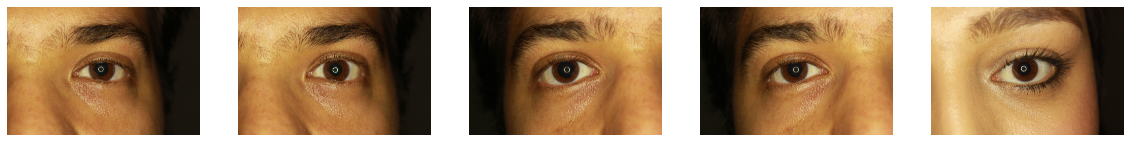

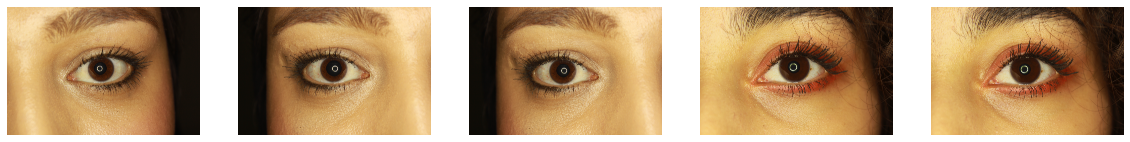

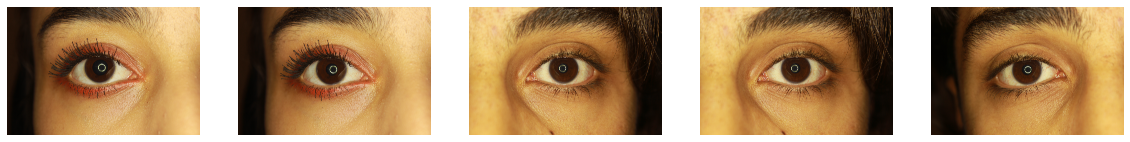

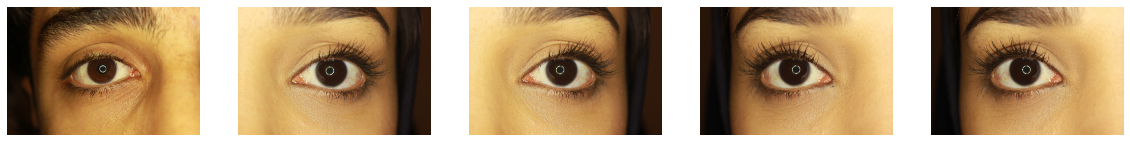

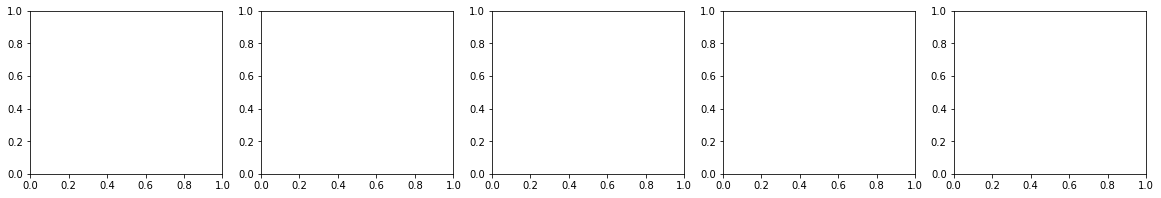

In [1]:

import matplotlib.pyplot as plt
import os
import pandas as pd
import csv
import cv2
import numpy as np
import mahotas as mh
from PIL import Image

# Set the directory path where your images are stored
main_directory = "C://Manasa//training_images//training_images"


# Initialize a counter to keep track of the number of images displayed
count = 0

# Create a figure and axis object
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 3))
for root, dirs, files in os.walk(main_directory):
    for dir_name in dirs:
        if count == 20:
            break
        for filename in os.listdir(os.path.join(root, dir_name)):
            if count == 20:  # exit the loop after displaying 20 images
                break
            image = cv2.imread(os.path.join(root, dir_name, filename))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            axs[count % 5].imshow(image)  # display image in the corresponding subplot
            axs[count % 5].axis('off')  # turn off axis labels
            count += 1
            if count % 5 == 0:  # if 5 images have been displayed, show the subplots and create new ones
                plt.show()
                fig, axs = plt.subplots(1, 5, figsize=(20, 3))




In [2]:
def segmentation(img_path):
    img = cv2.imread(img_path)

    # Get the original image size
    height, width = img.shape[:2]

    # Define the desired output size
    new_width = int(width/8)
    new_height = int(height/8)
    dim = (new_width, new_height)

    # Resize the image
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    # Display the resized image
    #cv2.imshow("Resized Image", img)
    #cv2.waitKey(0)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Segment the iris using a circular mask
    height, width = gray.shape
    mask = np.zeros((height, width), np.uint8)
    cx, cy = int(width/2), int(height/2)
    radius = int(min(height, width)/2*0.2)
    cv2.circle(mask, (cx, cy), radius, (255, 255, 255), -1)
    masked_img = cv2.bitwise_and(gray, gray, mask=mask)

    masked_img = masked_img[cy-radius:cy+radius, cx-radius:cx+radius]
    return masked_img

Segementation of iris from eye images

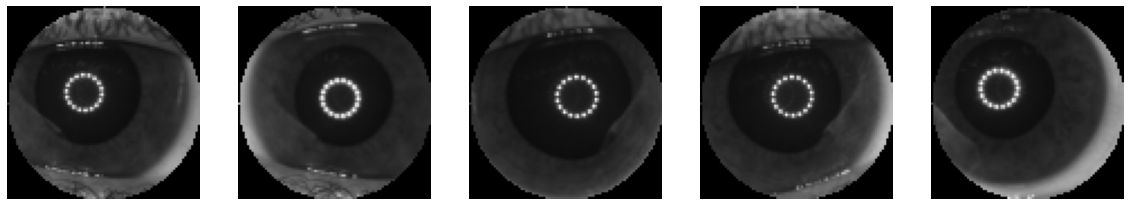

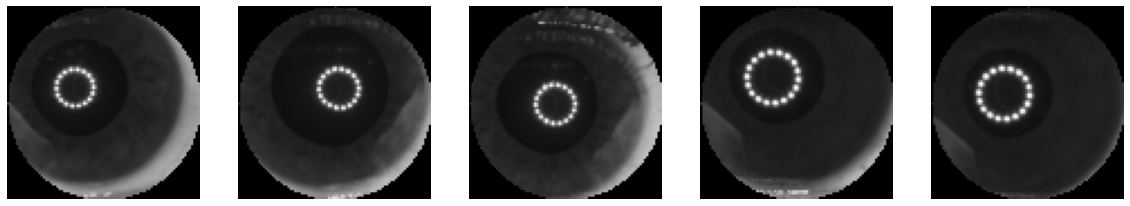

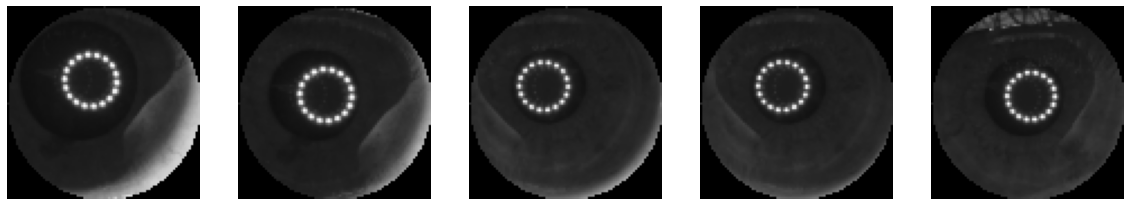

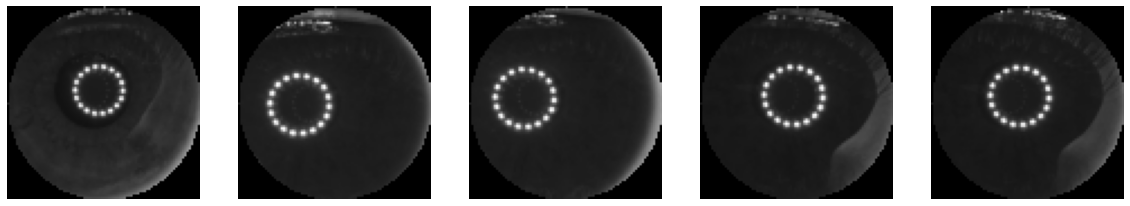

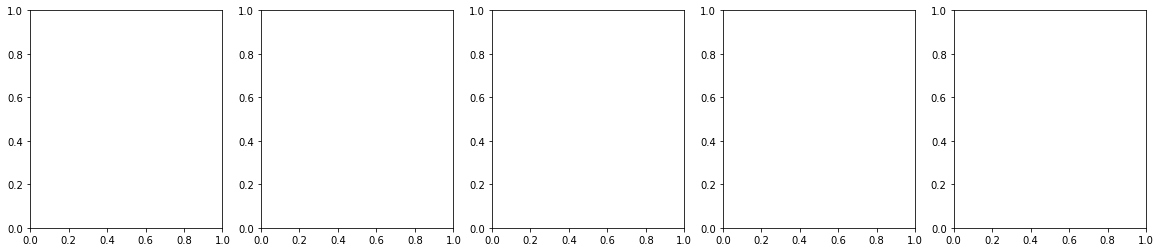

In [3]:
# Initialize a counter to keep track of the number of images displayed
count = 0

# Create a figure and axis object
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))
for root, dirs, files in os.walk(main_directory):
    for dir_name in dirs:
        for filename in os.listdir(os.path.join(root, dir_name)):
            if count == 20:  # exit the loop after displaying 20 images
                break
            image = segmentation(os.path.join(root, dir_name, filename))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            axs[count % 5].imshow(image)  # display image in the corresponding subplot
            axs[count % 5].axis('off')  # turn off axis labels
            count += 1
            if count % 5 == 0:  # if 5 images have been displayed, show the subplots and create new ones
                plt.show()
                fig, axs = plt.subplots(1, 5, figsize=(20, 4))
        if count == 20:
            break     

Extracting features using zernike moments method

In [4]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import csv
import cv2
import numpy as np
# Set the directory path where your images are stored
main_directory = "C://Manasa//training_images//training_images"

df = pd.read_excel("D://Manasa//UNT Studies//2nd Sem//info 5505//extra credits//iris_gender.xlsx")
#print(df.head(5))
# Create an empty list to store the IDs
id_list = []

for root, dirs, files in os.walk(main_directory):
    for dir_name in dirs:
        for filename in os.listdir(os.path.join(root, dir_name)):
            list_feature=[]
            seg_image = segmentation(os.path.join(root, dir_name, filename))
            # Apply the Zernike moments method to the iris region
            zernike_features = mh.features.zernike_moments(seg_image, 10)
            list_feature.append(dir_name)
            list_feature.append(filename[0])
            row = df.loc[df['ID'] == int(dir_name)]
            list_feature.append(row['Gender'].values[0]) 
            list_feature += zernike_features.tolist()
            id_list.append(list_feature)
                
            print(list_feature)
            
#print(id_list)  


['1', 'L', 'M', 0.318309886183791, 0.1982497221262344, 0.043397606662298235, 0.13239772190125756, 0.07047607540787997, 0.04202347952008479, 0.14252450147656687, 0.13503684445222527, 0.059659492096089596, 0.09359125065522236, 0.12461985595409496, 0.1163011692652357, 7.408145872142641e-07, 0.03303303110932397, 0.04844541558757214, 0.12050593628785201, 0.08058829928055691, 0.08885381885723304, 0.04965839685792342, 0.0801800596111409, 0.0330999497865054, 0.08520962340469472, 0.1245304645404715, 0.11884968942070318, 0.025592481097471188]
['1', 'L', 'M', 0.3183098861837899, 0.1313213945683055, 0.12489653448113434, 0.04274190561709744, 0.08692551221037528, 0.15486759248780588, 0.10887085204992539, 0.05799156020388948, 0.14412907941920777, 0.12152511700124792, 0.12451944817920728, 0.03955501210428041, 0.055233662715721034, 0.04398111202965328, 0.07039751578400844, 0.08254580154147635, 0.09154778091339871, 0.13571981667490418, 0.05269692279874226, 0.12165808955627092, 0.05656619641868181, 0.035

Converting to dataframe

In [5]:
df_features = pd.DataFrame(id_list, columns=['ID', 'side', 'gender','zf_1','zf_2','zf_3','zf_4','zf_5','zf_6','zf_7','zf_8','zf_9','zf_10','zf_11','zf_12','zf_13','zf_14','zf_15','zf_16','zf_17','zf_18','zf_19','zf_20','zf_21','zf_22','zf_23','zf_24','zf_25'])
df_features.to_csv('iris_features_final.csv', index=False)


preprocessing data

In [6]:
df_features.head(10)
df_features = df_features[df_features['side'] != 'I']

In [7]:
# get the unique values for each column

unique_side = df_features['side'].unique()

# replace the gender column with a numeric column
df_features['gender'] = df_features['gender'].replace({'M': 0, 'F': 1})
one_hot_side = pd.get_dummies(df_features['side'], prefix='side', prefix_sep='_').reindex(columns=['side_' + s for s in unique_side], fill_value=0)

# concatenate the one-hot encodings along the columns axis
one_hot = pd.concat([one_hot_side], axis=1)

# merge the one-hot encoding with the original DataFrame
df_encoded = pd.concat([df_features, one_hot], axis=1)
print(df.shape)
# print the result
print(df_encoded.head(10))



(720, 2)
    ID side  gender     zf_1      zf_2      zf_3      zf_4      zf_5  \
0    1    L       0  0.31831  0.198250  0.043398  0.132398  0.070476   
1    1    L       0  0.31831  0.131321  0.124897  0.042742  0.086926   
2    1    R       0  0.31831  0.006087  0.065023  0.136780  0.134340   
3    1    R       0  0.31831  0.099427  0.111356  0.051258  0.054692   
4   10    L       1  0.31831  0.082714  0.031365  0.005850  0.030366   
5   10    L       1  0.31831  0.074266  0.012540  0.018972  0.025667   
6   10    R       1  0.31831  0.200631  0.053469  0.131596  0.077807   
7   10    R       1  0.31831  0.140766  0.099395  0.157925  0.048076   
8  100    L       1  0.31831  0.025276  0.091349  0.093452  0.100324   
9  100    L       1  0.31831  0.084152  0.160654  0.126905  0.044315   

       zf_6      zf_7  ...     zf_18     zf_19     zf_20     zf_21     zf_22  \
0  0.042023  0.142525  ...  0.088854  0.049658  0.080180  0.033100  0.085210   
1  0.154868  0.108871  ...  0.135720  

Correlation matrix

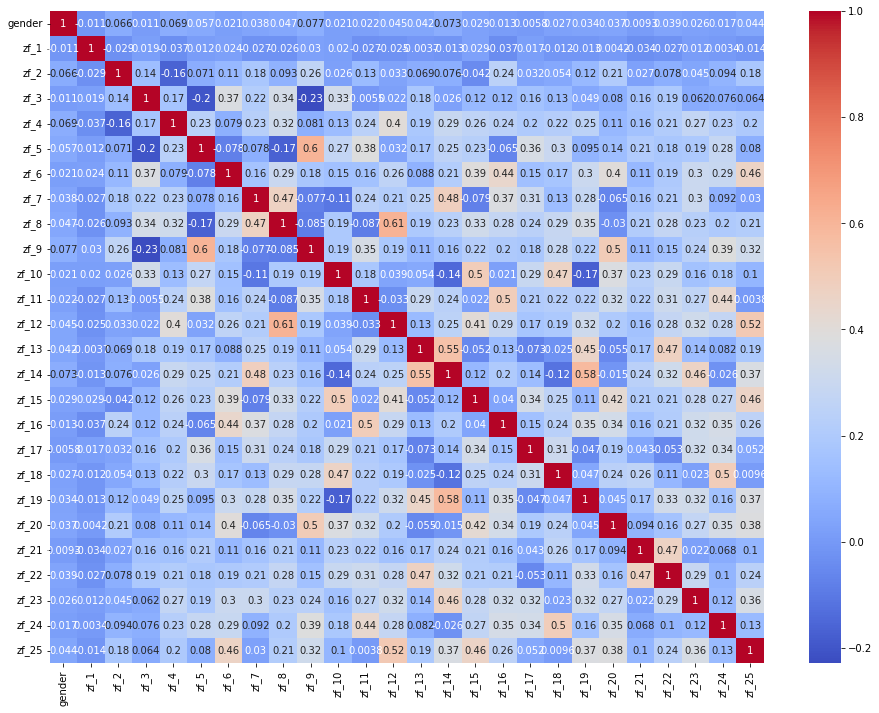

In [8]:
import seaborn as sns

# create a correlation matrix
corr_matrix = df_features.corr()
plt.figure(figsize=(16, 12))
# plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# show the plot
plt.show()

In [9]:
y=df_encoded['gender']
X=df_encoded.drop(['ID','side','gender'], axis=1)
print(y.head(10))
print(X.head(10))

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: gender, dtype: int64
      zf_1      zf_2      zf_3      zf_4      zf_5      zf_6      zf_7  \
0  0.31831  0.198250  0.043398  0.132398  0.070476  0.042023  0.142525   
1  0.31831  0.131321  0.124897  0.042742  0.086926  0.154868  0.108871   
2  0.31831  0.006087  0.065023  0.136780  0.134340  0.073722  0.044744   
3  0.31831  0.099427  0.111356  0.051258  0.054692  0.124665  0.109542   
4  0.31831  0.082714  0.031365  0.005850  0.030366  0.014630  0.020245   
5  0.31831  0.074266  0.012540  0.018972  0.025667  0.033815  0.028739   
6  0.31831  0.200631  0.053469  0.131596  0.077807  0.016397  0.112929   
7  0.31831  0.140766  0.099395  0.157925  0.048076  0.063576  0.133310   
8  0.31831  0.025276  0.091349  0.093452  0.100324  0.131839  0.055300   
9  0.31831  0.084152  0.160654  0.126905  0.044315  0.168785  0.169018   

       zf_8      zf_9     zf_10  ...     zf_18     zf_19     zf_20     zf_21  \
0  0.135

Train and test split data

In [10]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC



# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Apply SVC with best parameters

In [11]:
# define a range of hyperparameters to search over
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}

# create an SVM classifier object
svm = SVC()

# perform grid search cross-validation to find the optimal set of hyperparameters
svm_cv = GridSearchCV(svm, param_grid, cv=5)
svm_cv.fit(X_train, y_train)

# print the best set of hyperparameters and the resulting accuracy on the testing data
print('Best hyperparameters:', svm_cv.best_params_)
print('Accuracy on testing data:', svm_cv.score(X_test, y_test))

Best hyperparameters: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Accuracy on testing data: 0.5674676524953789


In [12]:
from sklearn.metrics import accuracy_score
# create an SVM classifier and fit it to the training data
svm = SVC(C=10, gamma=10, kernel='rbf')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
# compute the accuracy score of the classifier on the test data
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy on test data:', accuracy)

Accuracy on test data: 0.5674676524953789


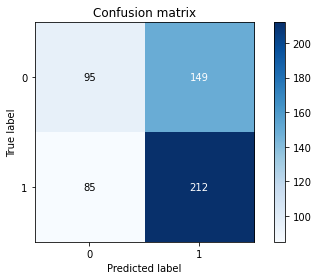

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=[0, 1], yticklabels=[0, 1],
       xlabel='Predicted label',
       ylabel='True label',
       title='Confusion matrix')
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()


In [15]:
# generate a classification report for the classifier
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.39      0.45       244
           1       0.59      0.71      0.64       297

    accuracy                           0.57       541
   macro avg       0.56      0.55      0.55       541
weighted avg       0.56      0.57      0.56       541

